<a href="https://colab.research.google.com/github/palayushi293/corn_diseases/blob/main/notebook4ff372f57e.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import kagglehub
rahmalisaaulia_corndiseases_path = kagglehub.dataset_download('rahmalisaaulia/corndiseases')

print('Data source import complete.')


In [ ]:

import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/corndiseases/Plant Diseases/valid/Corn_(maize)___Northern_Leaf_Blight/919505a0-7e06-4a89-8faf-f308bd644a6a___RS_NLB 4141.JPG
/kaggle/input/corndiseases/Plant Diseases/valid/Corn_(maize)___Northern_Leaf_Blight/d1fbc905-f7df-4f45-b228-0a94b00f16ee___RS_NLB 3488.JPG
/kaggle/input/corndiseases/Plant Diseases/valid/Corn_(maize)___Northern_Leaf_Blight/b761537f-f90f-43a6-a816-6d515dfa0e26___RS_NLB 3797.JPG
/kaggle/input/corndiseases/Plant Diseases/valid/Corn_(maize)___Northern_Leaf_Blight/07f5df82-5df0-446f-a13a-d35a2ef9b2df___RS_NLB 4226.JPG
/kaggle/input/corndiseases/Plant Diseases/valid/Corn_(maize)___Northern_Leaf_Blight/b7cc5fb5-a617-4137-bd5f-2236413ec4bc___RS_NLB 3794_flipTB.JPG
/kaggle/input/corndiseases/Plant Diseases/valid/Corn_(maize)___Northern_Leaf_Blight/b7006121-2aa1-4f79-a5e2-e731a1c1eb60___RS_NLB 4093.JPG
/kaggle/input/corndiseases/Plant Diseases/valid/Corn_(maize)___Northern_Leaf_Blight/d77fa827-9282-439b-8e87-5759c64cc852___RS_NLB 4285_flipTB.JPG
/kaggle/input

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
import tensorflow as tf

In [ ]:
image=PIL.Image.open('/kaggle/input/corndiseases/Plant Diseases/train/Corn_(maize)___Common_rust_/RS_Rust 1563.JPG')

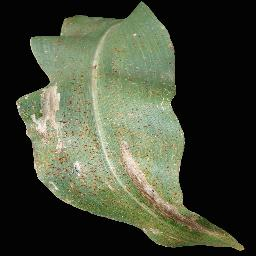

In [ ]:
image

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_corn_dir='/kaggle/input/corndiseases/Plant Diseases/train'
train_generator=ImageDataGenerator(rescale=1/255)
data_corn_train=train_generator.flow_from_directory(train_corn_dir,target_size=(120,120),batch_size=32,class_mode='categorical')

Found 7316 images belonging to 4 classes.


In [ ]:
valid_corn_dir='/kaggle/input/corndiseases/Plant Diseases/valid'
valid_generator=ImageDataGenerator(rescale=1/255)
data_corn_valid=valid_generator.flow_from_directory(valid_corn_dir,target_size=(120,120),batch_size=32,class_mode='categorical')

Found 1829 images belonging to 4 classes.


In [ ]:
test_corn_dir='/kaggle/input/corndiseases/Plant Diseases/test'
test_generator=ImageDataGenerator(rescale=1/255)
data_corn_test=test_generator.flow_from_directory(test_corn_dir, target_size=(120,120),batch_size=32,class_mode='categorical')

Found 0 images belonging to 0 classes.


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(120, 120, 3)),
    tf.keras.layers.Conv2D(32, (3, 3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation='sigmoid')
])


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 118, 118, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 59, 59, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 57, 57, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 26, 26, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 11, 11, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │        25,604 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 414,020 (1.58 MB)

 Trainable params: 414,020 (1.58 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=.001),loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
history=model.fit(data_corn_train,epochs=6,validation_data=data_corn_valid)

Epoch 1/6
229/229 ━━━━━━━━━━━━━━━━━━━━ 112s 482ms/step - accuracy: 0.7205 - loss: 0.6421 - val_accuracy: 0.9060 - val_loss: 0.3103
Epoch 2/6
229/229 ━━━━━━━━━━━━━━━━━━━━ 142s 480ms/step - accuracy: 0.9241 - loss: 0.2026 - val_accuracy: 0.9486 - val_loss: 0.1861
Epoch 3/6
229/229 ━━━━━━━━━━━━━━━━━━━━ 142s 480ms/step - accuracy: 0.9584 - loss: 0.1215 - val_accuracy: 0.9584 - val_loss: 0.1435
Epoch 4/6
229/229 ━━━━━━━━━━━━━━━━━━━━ 111s 484ms/step - accuracy: 0.9571 - loss: 0.1232 - val_accuracy: 0.9448 - val_loss: 0.2340
Epoch 5/6
229/229 ━━━━━━━━━━━━━━━━━━━━ 141s 478ms/step - accuracy: 0.9696 - loss: 0.0860 - val_accuracy: 0.9601 - val_loss: 0.1093
Epoch 6/6
229/229 ━━━━━━━━━━━━━━━━━━━━ 110s 477ms/step - accuracy: 0.9663 - loss: 0.0917 - val_accuracy: 0.9338 - val_loss: 0.2085


In [ ]:
val_loss, val_accuracy = model.evaluate(data_corn_valid)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 145ms/step - accuracy: 0.9344 - loss: 0.1974
Validation Accuracy: 93.38%


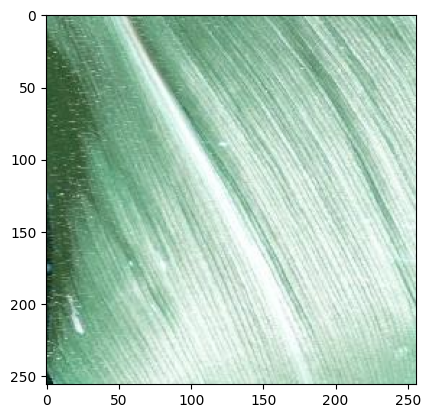

In [ ]:
import cv2
test_im=cv2.imread('/kaggle/input/corndiseases/Plant Diseases/train/Corn_(maize)___healthy/00665f92-adb0-41eb-bba7-9eeadecfe10e___R.S_HL 8325 copy 2_flipLR.jpg')
plt.imshow(test_im)


In [ ]:
test_im=cv2.resize(test_im,(120,120))

In [ ]:
test_input=test_im.reshape((1,120,120,3))

In [ ]:

model.predict(test_input)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array([[0., 0., 0., 1.]], dtype=float32)

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array



img_path = '/kaggle/input/corndiseases/Plant Diseases/train/Corn_(maize)___Common_rust_/RS_Rust 1565.JPG'



img = load_img(img_path, target_size=(120,120))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)


img_array = img_array / 255.0


predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

print(f"Predicted class: {predicted_class[0]}")

if(predicted_class[0]==0):
    print("cercospora_leaf_spot_gray_leaf spot")
elif(predicted_class[0]==1):
    print("common rust")
elif(predicted_class[0]==2):
    print("Northern leaf blight")
else:
    print("healthy")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted class: 1
helo
